<a href="https://colab.research.google.com/github/turnerluke/digit_recog/blob/main/train_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Unpack Data

In [82]:
from keras.datasets import mnist
from keras.utils import np_utils
# Unpack data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore Data

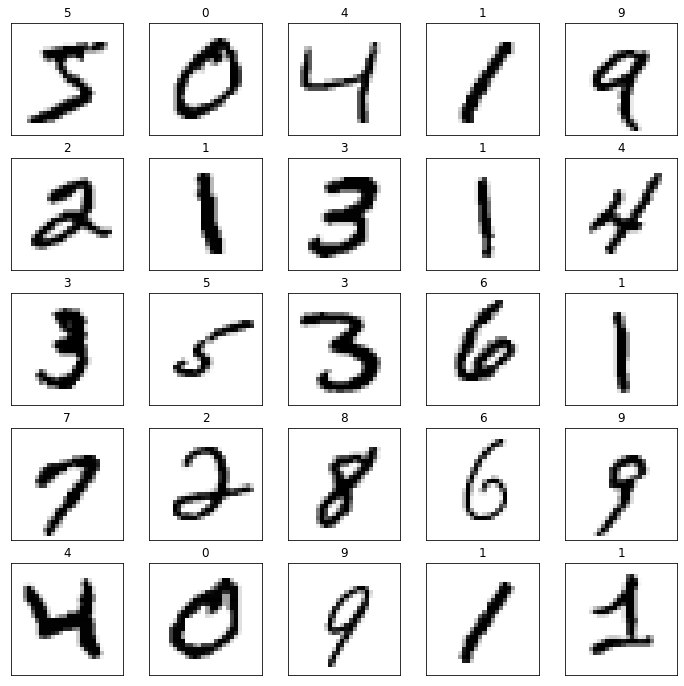

In [83]:
rows, cols = 5, 5
fig, axs = plt.subplots(rows, cols, figsize=(12, 12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(X_train[i], cmap=plt.cm.binary)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(y_train[i])
  
plt.show()

# Preprocess

In [84]:
# Preprocess data
train_points = X_train.shape[0]
test_points = X_test.shape[0]
input_dim = np.prod(X_train.shape[1:])

X_train = X_train.reshape((train_points, input_dim)).astype('float32')
X_test = X_test.reshape((test_points, input_dim)).astype('float32')

X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Create Model

In [85]:
from keras.models import Sequential
from keras.layers import Dense
# Create model
nn = Sequential()
nn.add(Dense(32, input_dim = input_dim))
nn.add(Dense(64, activation = 'relu'))
nn.add(Dense(10, activation = 'softmax'))
nn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [86]:
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [87]:
# Train model
nn.fit(X_train, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4204 - accuracy: 0.8802
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2068 - accuracy: 0.9416
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1597 - accuracy: 0.9541
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1332 - accuracy: 0.9607
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1170 - accuracy: 0.9657
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1035 - accuracy: 0.9702
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0928 - accuracy: 0.9724
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0839 - accuracy: 0.9750
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0775 - accuracy: 0.9773
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0705 - accuracy: 0.9789

# Evaluate Model

In [88]:
# Evaluate
scores = nn.evaluate(X_test, y_test)
print(f'Accuracy: {scores[1] * 100:.2f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9668
Accuracy: 96.68


In [89]:
# Predict outputs, and turn y_test back into values vs categoricals
pred = nn.predict(X_test)
pred = np.argmax(pred, axis=1)

y_test_vals = np.argmax(y_test, axis=1)

print(pred.shape)
print(y_test_vals.shape)

(10000,)
(10000,)


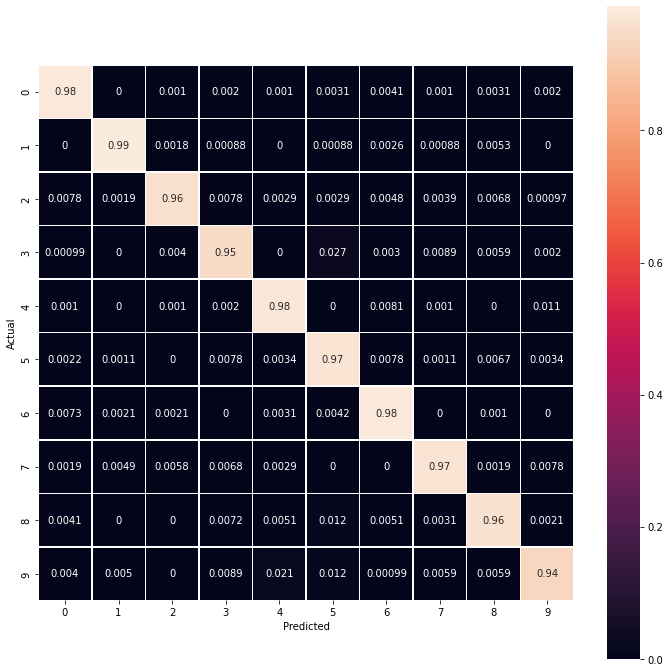

In [90]:
# Confusion Matrix

cm = tf.math.confusion_matrix(y_test_vals, pred).numpy()
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    cm,
    annot=True,
    linewidths=0.5,
#    fmt='d',
    square=True,
    ax=ax
)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

# Save Model

In [91]:
# Save the model
nn.save("model.h5")